In [16]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

import sys
import os

sys.path.append(os.path.abspath("..\\.."))
from objects.ThreeQbCode import ThreeQbCodeCircuit

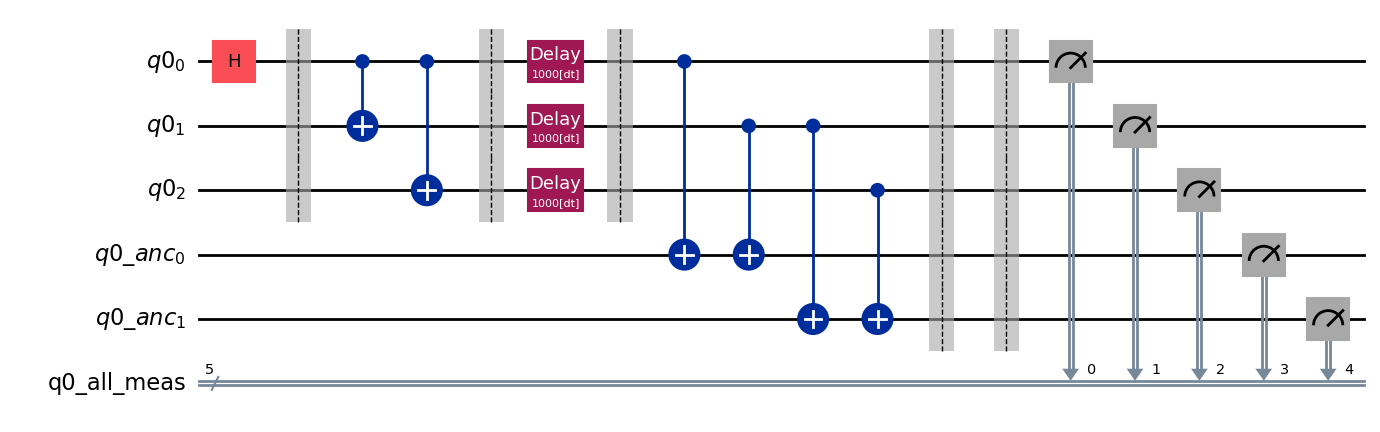

In [17]:
def load_circuit(delay, qb_len=1):
    qc = ThreeQbCodeCircuit(qb_len, type='bit_flip')

    qc.initial_state(state='+')
    qc.encode()
    # qc.random_error()
    qc.delay(delay)
    
    qc.spot_syndrome()
    # qc.correct()
    
    qc.measure_all()
    # qc.measure_syndrome()

    return qc

qc = load_circuit(1000, qb_len=1)
qc.draw('mpl')

In [18]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_brisbane")

In [19]:
phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')

Circuit Depth: 9
Transpiled Circuit Depth: 49


In [20]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.5 ns


In [21]:
# t_array = [0, 40_000, 80_000, 120_000, 160_000, 200_000, 240_000, 280_000, 320_000, 360_000, 400_000]
t_array = range(0, 21)
t_array = [t*10_000 for t in t_array]

circuits = []

for t in t_array:

    qc = load_circuit(t, qb_len=1)

    isa_circuit = transpile(qc.physical_circuit, backend, scheduling_method="asap", optimization_level=3)
                            # , initial_layout=[q.Qubit for q in best_T1_qubits])
    circuits.append(isa_circuit)

    print(f"Circuit Depth: {circuits[-1].depth()}")
    print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} μs")
    print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
    # c.draw(output='mpl')

Circuit Depth: 38
Delay Duration: 0.0 μs
Total Duration: 7.84 μs

Circuit Depth: 39
Delay Duration: 5.0 μs
Total Duration: 12.84 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


Circuit Depth: 39
Delay Duration: 10.0 μs
Total Duration: 17.84 μs

Circuit Depth: 39
Delay Duration: 15.0 μs
Total Duration: 22.84 μs

Circuit Depth: 39
Delay Duration: 20.0 μs
Total Duration: 27.84 μs

Circuit Depth: 49
Delay Duration: 25.0 μs
Total Duration: 35.12 μs

Circuit Depth: 39
Delay Duration: 30.0 μs
Total Duration: 37.84 μs

Circuit Depth: 39
Delay Duration: 35.0 μs
Total Duration: 42.84 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: De

Circuit Depth: 39
Delay Duration: 40.0 μs
Total Duration: 47.84 μs

Circuit Depth: 49
Delay Duration: 45.0 μs
Total Duration: 55.12 μs

Circuit Depth: 49
Delay Duration: 50.0 μs
Total Duration: 60.12 μs

Circuit Depth: 39
Delay Duration: 55.0 μs
Total Duration: 62.84 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: De

Circuit Depth: 39
Delay Duration: 60.0 μs
Total Duration: 67.84 μs

Circuit Depth: 39
Delay Duration: 65.0 μs
Total Duration: 72.84 μs

Circuit Depth: 39
Delay Duration: 70.0 μs
Total Duration: 77.84 μs

Circuit Depth: 39
Delay Duration: 75.0 μs
Total Duration: 82.84 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: De

Circuit Depth: 39
Delay Duration: 80.0 μs
Total Duration: 87.84 μs

Circuit Depth: 49
Delay Duration: 85.0 μs
Total Duration: 95.12 μs

Circuit Depth: 59
Delay Duration: 90.0 μs
Total Duration: 102.28 μs

Circuit Depth: 39
Delay Duration: 95.0 μs
Total Duration: 102.84 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")
C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: De

Circuit Depth: 39
Delay Duration: 100.0 μs
Total Duration: 107.84 μs



C:\Users\marzu\AppData\Local\Temp\ipykernel_61068\1123237955.py:17: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} μs\n")


In [22]:
def get_layout(circuit, qb_len=1):
    layout = circuit._layout.initial_layout.get_virtual_bits()
    # print(layout)
    keys = [layout[i] for i in layout]
    return keys[:qb_len]

# for c in circuits:
#     print(get_layout(c, qb_len=3))

In [23]:
def sampler_simulation(circuit, samples):

    from qiskit_aer.primitives import SamplerV2

    exact_sampler = SamplerV2()

    # Transpilamos el circuito
    pass_manager = generate_preset_pass_manager(3, AerSimulator())
    isa_circuit = pass_manager.run(circuit)

    # Corremos el circuito:
    pub = (isa_circuit, None, samples) # Notemos que tambien funciona si le pasamos el circuito qc
    job = exact_sampler.run([pub])

    result = job.result()
    pub_result = result[0]

    for lq in qc.qubits:

        state = lq.all_measures
        print(f"  {state.name}: {pub_result.data[state.name].get_counts()}")

sampler_simulation(qc.physical_circuit, 100)

  q0_all_meas: {'00111': 54, '00000': 46}


In [24]:
sampler = SamplerV2(backend=backend)
shots = 100
# job = sampler.run(circuits, shots=shots)
job = service.job('cy63amacw2k0008jx19g')
pub_result = job.result()

In [75]:
qb_states = ['000', '111', '001', '010', '100', '011', '101', '110']
all_states = [s + '0' for s in qb_states] + [s + '1' for s in qb_states]
all_states = [s + '0' for s in all_states] + [s + '1' for s in all_states]
syn_states = ['00', '01', '10', '11']

all_results = []
syn_results = []
qb_results = []
corrected_results = []

for i in range(len(t_array)):
    result = pub_result[i]
    meas = result['__value__']['data']['q0_all_meas'].get_counts()
    # results.append({
    #     '111': meas['111'] if '111' in meas else 0,
    #     '000': meas['000'] if '000' in meas else 0,
    #     'other states': sum([meas[k] for k in meas if k not in ['000', '111']]),
    # })
    res = {}
    for k in all_states:
        res[k] = meas[k[::-1]] if k[::-1] in meas else 0
    all_results.append(res)

    res = {}
    for k in qb_states:
        res[k] = sum([meas[m] for m in meas if m[::-1][:3] == k])
    qb_results.append(res)

    res = {}
    for k in syn_states:
        res[k] = sum([meas[m] for m in meas if m[::-1][3:] == k])
    syn_results.append(res)

    corrected_meas = {}
    for k in qb_states:
        corrected_meas[k] = 0
    for m in meas:
        qb = list(m[::-1][:3])
        syn = m[::-1][3:]
        match syn:
            case '10':
                qb[0] = str(1-int(qb[0]))
            case '01':
                qb[2] = str(1-int(qb[2]))
            case '11':
                qb[1] = str(1-int(qb[1]))
            case '00':
                pass
        corrected_meas[''.join(qb)] += meas[m]
    corrected_results.append(corrected_meas)



In [76]:
delays = [round(t*dt/1000) for t in t_array]
# print(f" delay\t| 111\t| 000\t| other states")
print(f" delay (μs)", *[f"{s}" for s in all_states], sep='\t| ')
print("----------------------------------------------------------------------------------------------")
for i in range(len(t_array)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {delays[i]}\t", *[all_results[i][s] for s in all_states], sep='\t ')


 delay (μs)	| 00000	| 11100	| 00100	| 01000	| 10000	| 01100	| 10100	| 11000	| 00010	| 11110	| 00110	| 01010	| 10010	| 01110	| 10110	| 11010	| 00001	| 11101	| 00101	| 01001	| 10001	| 01101	| 10101	| 11001	| 00011	| 11111	| 00111	| 01011	| 10011	| 01111	| 10111	| 11011
----------------------------------------------------------------------------------------------
 0		 28	 30	 3	 1	 1	 0	 0	 3	 3	 5	 0	 0	 0	 0	 0	 0	 6	 3	 4	 0	 0	 2	 0	 2	 1	 0	 2	 2	 0	 0	 3	 1
 5		 16	 6	 2	 0	 1	 1	 2	 3	 8	 7	 3	 0	 0	 0	 1	 4	 7	 4	 3	 1	 0	 1	 0	 0	 6	 16	 0	 2	 2	 1	 1	 2
 10		 14	 4	 0	 0	 1	 0	 2	 1	 11	 7	 1	 1	 1	 3	 0	 1	 9	 7	 1	 0	 1	 2	 1	 1	 5	 14	 1	 2	 0	 4	 2	 3
 15		 5	 7	 0	 1	 0	 2	 1	 6	 10	 11	 3	 1	 0	 2	 0	 1	 7	 13	 2	 2	 1	 0	 1	 3	 10	 3	 2	 1	 0	 2	 1	 2
 20		 4	 8	 2	 1	 0	 0	 0	 4	 12	 8	 0	 1	 0	 2	 2	 5	 6	 8	 2	 0	 1	 0	 3	 2	 9	 13	 1	 0	 1	 2	 0	 3
 25		 0	 4	 2	 7	 1	 3	 1	 0	 3	 4	 5	 3	 1	 1	 5	 3	 2	 4	 5	 3	 3	 2	 1	 3	 7	 12	 3	 1	 4	 2	 1	 4
 30		 7	 10	 2	 0	 

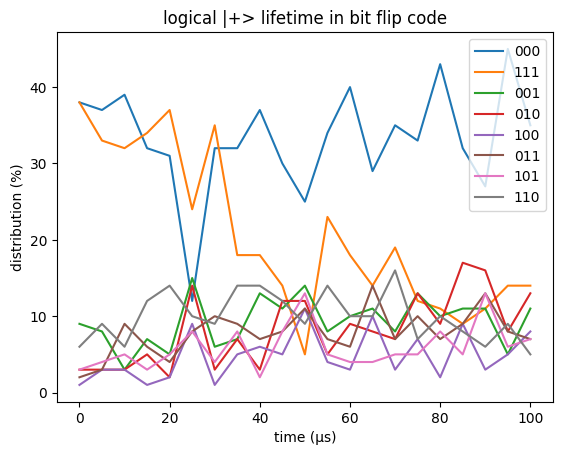

In [63]:
import matplotlib.pyplot as plt
import math

# Example data arrays
x = delays
y = {}
for s in qb_states:
    y[s] = [r[s] for r in qb_results]

    plt.plot(x, y[s], label=s)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |+> lifetime in bit flip code')
plt.legend()

# Display the plot
plt.show()

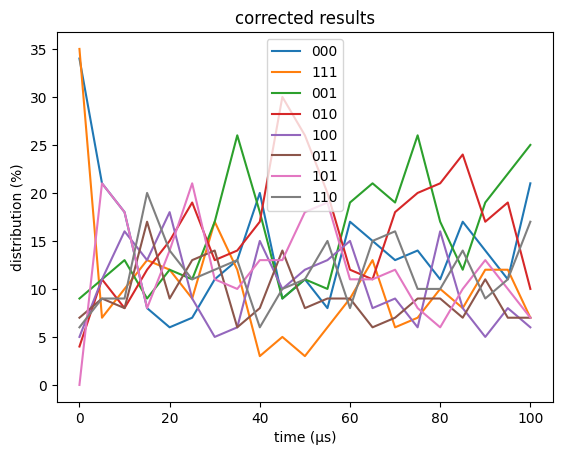

In [77]:
import matplotlib.pyplot as plt
import math

# Example data arrays
x = delays
y = {}
for s in qb_states:
    y[s] = [r[s] for r in corrected_results]

    plt.plot(x, y[s], label=s)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('corrected results')
plt.legend()

# Display the plot
plt.show()

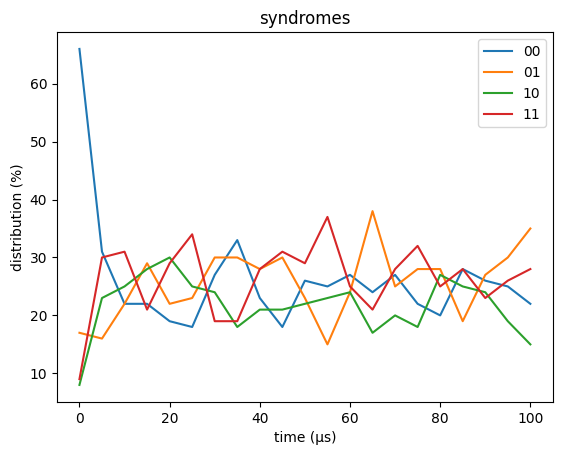

In [65]:
import matplotlib.pyplot as plt
import math

# Example data arrays
x = delays
y = {}
for s in syn_states:
    y[s] = [r[s] for r in syn_results]

    plt.plot(x, y[s], label=s)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('syndromes')
plt.legend()

# Display the plot
plt.show()